# Titanic - Machine Learning from Disaster

## Import Necessary Libraries

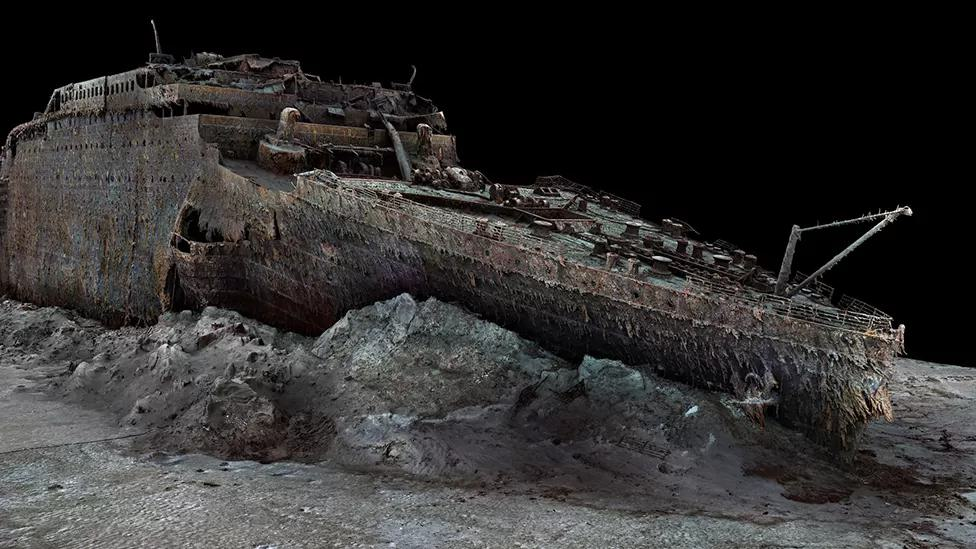

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from IPython.display import Image
Image("G:/ML portfolio projects//_129747782_newbow.jpg")

## Load and Explore the Data

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

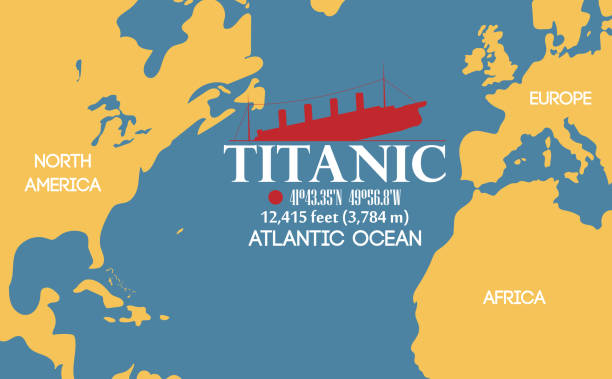

In [2]:
# Load the training and test datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the training dataset
print(train_data.head())

# Display the first few rows of the test dataset
print(test_data.head())

# Check the shape of the datasets
print("Training data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

# Check for missing values
print("Missing values in training data:")
print(train_data.isnull().sum())

print("Missing values in test data:")
print(test_data.isnull().sum())

# Get statistical summaries of the datasets
print("Summary of training data:")
print(train_data.describe())

print("Summary of test data:")
print(test_data.describe())

Image("G:/ML portfolio projects//Titanic.jpg")

In [3]:
# Replace missing values in the Age column with the average age
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

# Replace missing values in the Cabin column with 'Unknown'
train_data['Cabin'].fillna('Unknown', inplace=True)
test_data['Cabin'].fillna('Unknown', inplace=True)

# Replace missing values in the Embarked column with the most frequent value
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Replace missing values in the Fare column with the average fare
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [4]:
# Check for missing values
print("Missing values in training data:")
print(train_data.isnull().sum())

print("Missing values in test data:")
print(test_data.isnull().sum())

Missing values in training data:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
Missing values in test data:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [5]:
print("Summary of training data:")
print(train_data.describe())

print("Summary of test data:")
print(test_data.describe())

Summary of training data:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Summary of test data:
       PassengerId      Pclass   

## Exploratory Data Analysis (EDA)

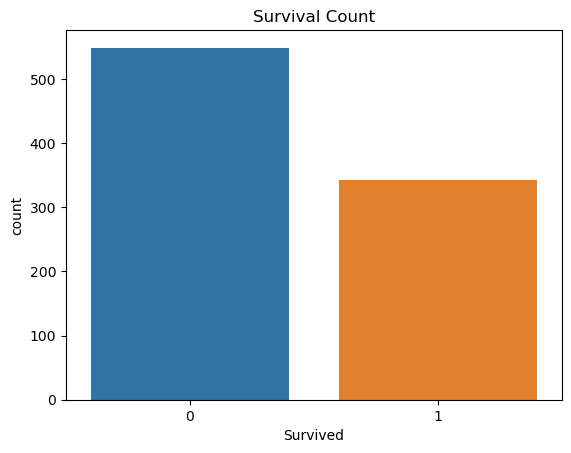

In [6]:
# Count the number of survivors
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.show()

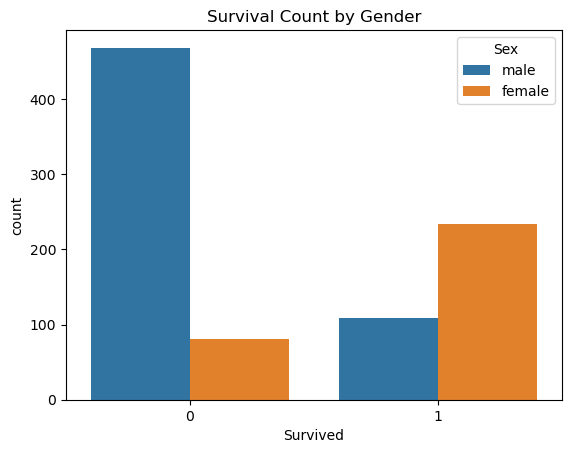

In [7]:
# Compare the survival rate by gender
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Survival Count by Gender')
plt.show()

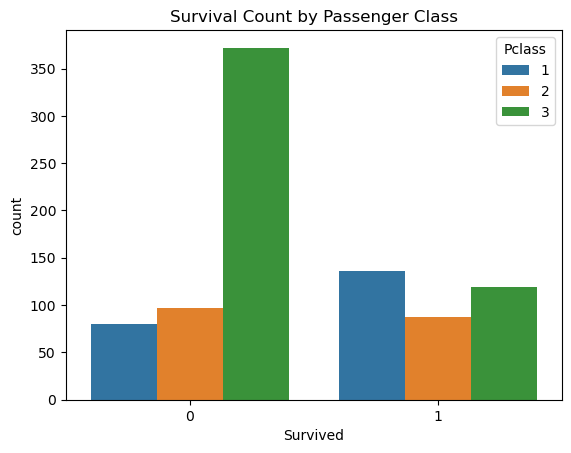

In [8]:
# Compare the survival rate by passenger class
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Survival Count by Passenger Class')
plt.show()

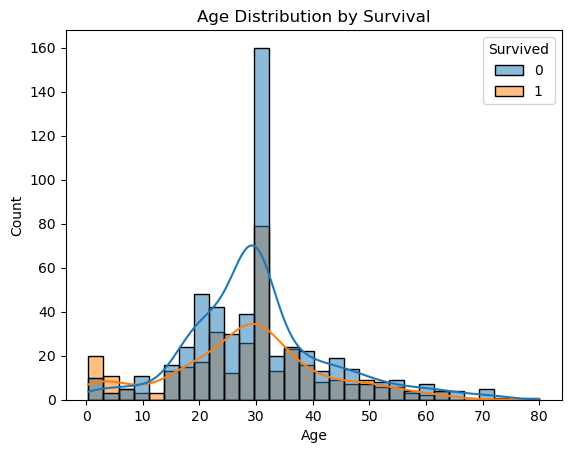

In [9]:
# Plot the distribution of age among survivors and non-survivors
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

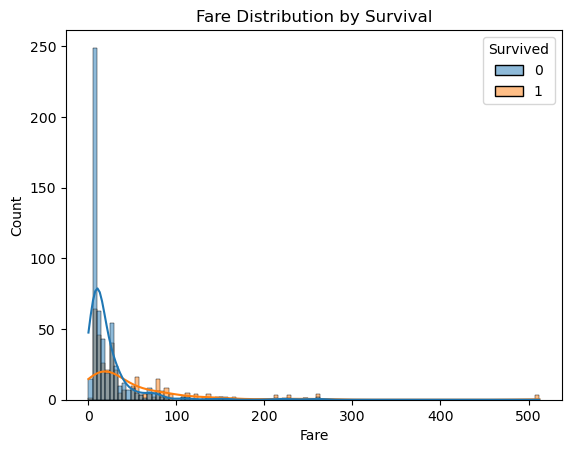

In [10]:
# Plot the fare distribution among survivors and non-survivors
sns.histplot(data=train_data, x='Fare', hue='Survived', kde=True)
plt.title('Fare Distribution by Survival')
plt.show()

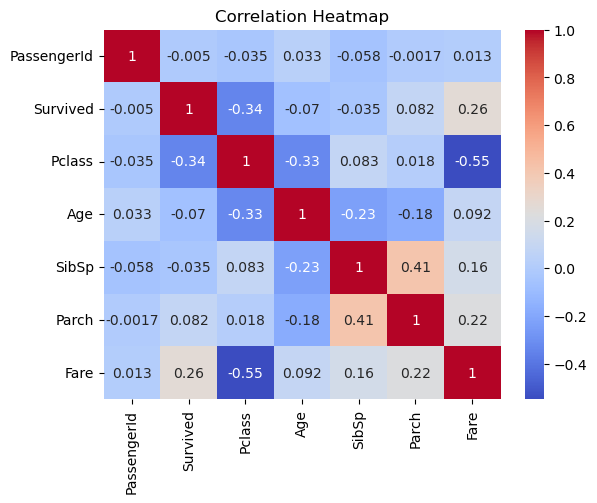

In [11]:
# Create a correlation heatmap
corr = train_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



## Feature Engineering

In [12]:
# Combine the SibSp and Parch columns to create a new feature 'FamilySize'
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [13]:
# Extract the title from the 'Name' column and create a new feature 'Title'
train_data['Title'] = train_data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
test_data['Title'] = test_data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [14]:
# Group rare titles into a single category 'Rare'
rare_titles = ['Rev', 'Dr', 'Major', 'Col', 'Capt']
train_data['Title'] = train_data['Title'].replace(rare_titles, 'Rare')
test_data['Title'] = test_data['Title'].replace(rare_titles, 'Rare')

In [15]:
# Perform one-hot encoding for categorical variables 'Sex', 'Embarked', and 'Title'
categorical_cols = ['Sex', 'Embarked', 'Title']
train_data = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)
test_data = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)

In [16]:
# Binning the 'Age' feature into different age groups
age_bins = [0, 12, 18, 30, 50, 80]
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=age_bins, labels=age_labels)
test_data['AgeGroup'] = pd.cut(test_data['Age'], bins=age_bins, labels=age_labels)

In [17]:
# Perform one-hot encoding for the 'AgeGroup' feature
train_data = pd.get_dummies(train_data, columns=['AgeGroup'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['AgeGroup'], drop_first=True)

In [18]:
# Drop unnecessary columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age']
train_data = train_data.drop(columns=columns_to_drop)
test_data = test_data.drop(columns=columns_to_drop)

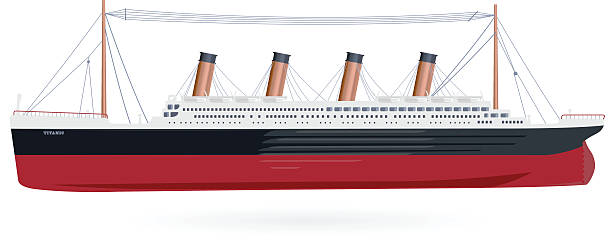

In [19]:
# Scale the 'Fare' feature using min-max scaling
fare_min = train_data['Fare'].min()
fare_max = train_data['Fare'].max()
train_data['Fare'] = (train_data['Fare'] - fare_min) / (fare_max - fare_min)
test_data['Fare'] = (test_data['Fare'] - fare_min) / (fare_max - fare_min)


Image("G:/ML portfolio projects//Titanic 1.jpg")

## Split the Data (Not need in this case)

Training dataset shape: (891, 24) (891,)
Test dataset shape: (418, 18) (418,)


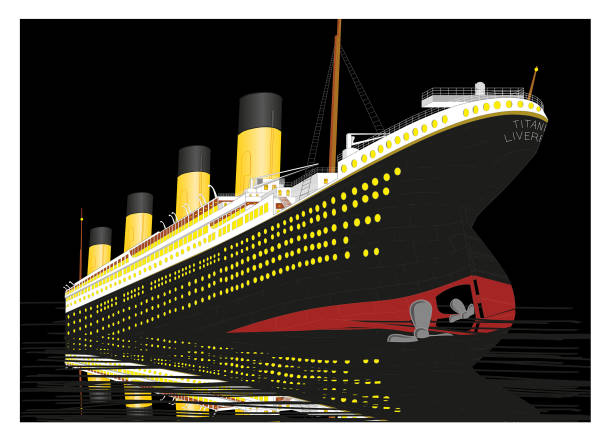

In [20]:
#Since the dataset is already split into training and test sets, there is no need to perform an additional split. I can directly use the provided training set for training the model and the provided test set to evaluate its performance.

# Separate the features (X) and the target variable (y) in the training dataset
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']

# Display the shape of the training dataset
print("Training dataset shape:", X_train.shape, y_train.shape)

# Use the provided test dataset as the evaluation set
X_test = test_data
y_test = pd.read_csv('gender_submission.csv')['Survived']

# Display the shape of the test dataset
print("Test dataset shape:", X_test.shape, y_test.shape)



Image("G:/ML portfolio projects//Titanic 2.jpg")

## Model Selection and Training

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Initialize the models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()
xgboost = xgb.XGBClassifier()

# Train the models
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)
xgboost.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## Model Evaluation

### Logistic Regression Model

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Reindex the test dataset to match the columns in the training dataset
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Make predictions on the training set
y_train_pred = logistic_regression.predict(X_train)

# Calculate evaluation metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = logistic_regression.predict(X_test)

# Calculate evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Logistic Regression Model Evaluation:")

print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1_score)
print("Training ROC AUC Score:", train_roc_auc)
print("")

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)
print("Test ROC AUC Score:", test_roc_auc)
print("")


Logistic Regression Model Evaluation:
Training Accuracy: 0.8305274971941639
Training Precision: 0.7920489296636085
Training Recall: 0.7573099415204678
Training F1 Score: 0.7742899850523169
Training ROC AUC Score: 0.8167241875179753

Test Accuracy: 0.916267942583732
Test Precision: 0.8421052631578947
Test Recall: 0.9473684210526315
Test F1 Score: 0.8916408668730651
Test ROC AUC Score: 0.9229323308270676



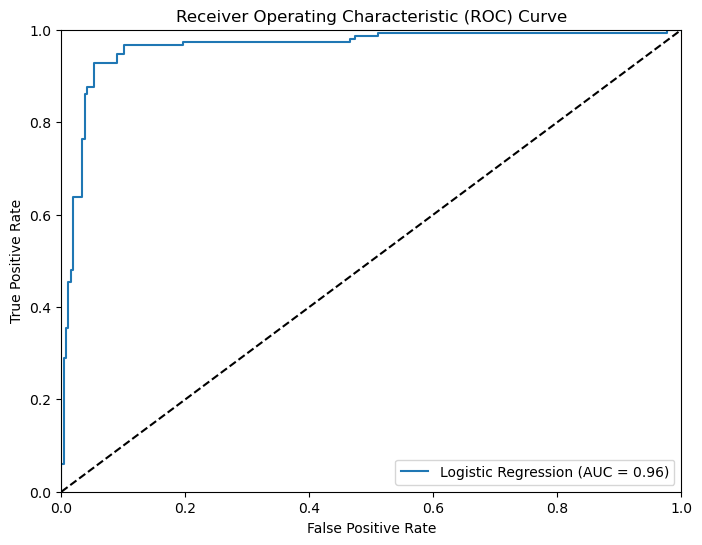

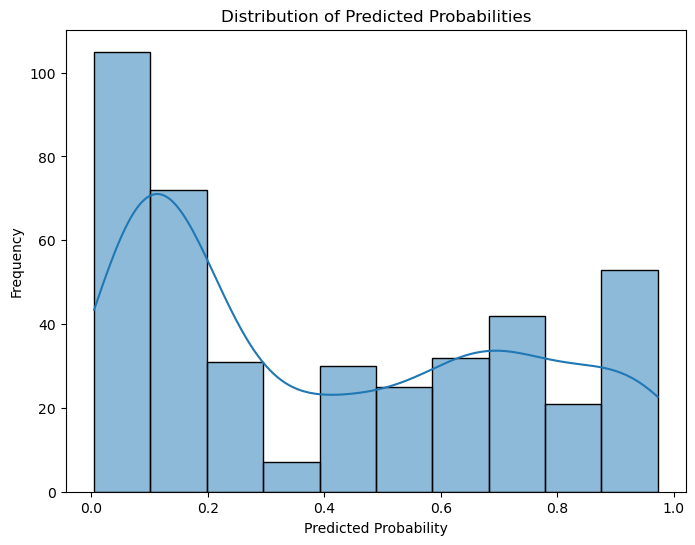

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

# Make predictions on the test set
y_test_pred_prob = logistic_regression.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
auc_score = roc_auc_score(y_test, y_test_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot the predicted probabilities distribution
plt.figure(figsize=(8, 6))
sns.histplot(y_test_pred_prob, kde=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()


### Decision Tree Model

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the decision tree model
decision_tree = DecisionTreeClassifier()

# Train the decision tree model
decision_tree.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = decision_tree.predict(X_train)

# Calculate evaluation metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = decision_tree.predict(X_test)

# Calculate evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Decision Tree Model Evaluation:")
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1_score)
print("Training ROC AUC Score:", train_roc_auc)
print("")

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)
print("Test ROC AUC Score:", test_roc_auc)

Decision Tree Model Evaluation:
Training Accuracy: 0.9472502805836139
Training Precision: 0.9566563467492261
Training Recall: 0.9035087719298246
Training F1 Score: 0.9293233082706767
Training ROC AUC Score: 0.939003930591506

Test Accuracy: 0.80622009569378
Test Precision: 0.7261146496815286
Test Recall: 0.75
Test F1 Score: 0.737864077669903
Test ROC AUC Score: 0.7941729323308271


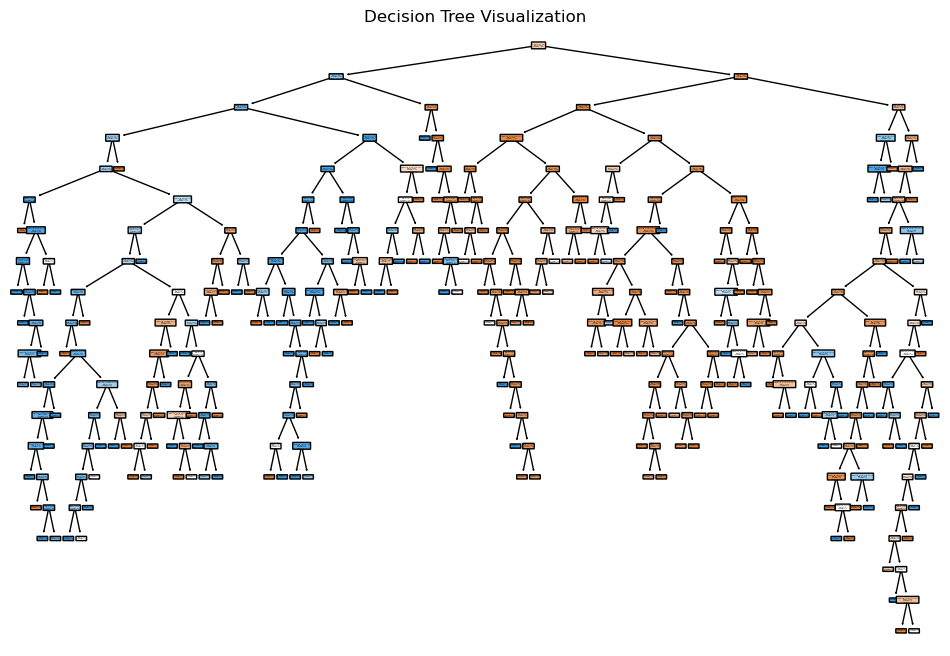

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X_train.columns.tolist(), filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

### Random Forest Model

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the random forest model
random_forest = RandomForestClassifier()

# Train the random forest model
random_forest.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = random_forest.predict(X_train)

# Calculate evaluation metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = random_forest.predict(X_test)

# Calculate evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Random Forest Model Evaluation:")
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1_score)
print("Training ROC AUC Score:", train_roc_auc)
print("")

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)
print("Test ROC AUC Score:", test_roc_auc)


Random Forest Model Evaluation:
Training Accuracy: 0.9472502805836139
Training Precision: 0.9483282674772037
Training Recall: 0.9122807017543859
Training F1 Score: 0.9299552906110282
Training ROC AUC Score: 0.9406576550666282

Test Accuracy: 0.8038277511961722
Test Precision: 0.7397260273972602
Test Recall: 0.7105263157894737
Test F1 Score: 0.7248322147651005
Test ROC AUC Score: 0.7838345864661654


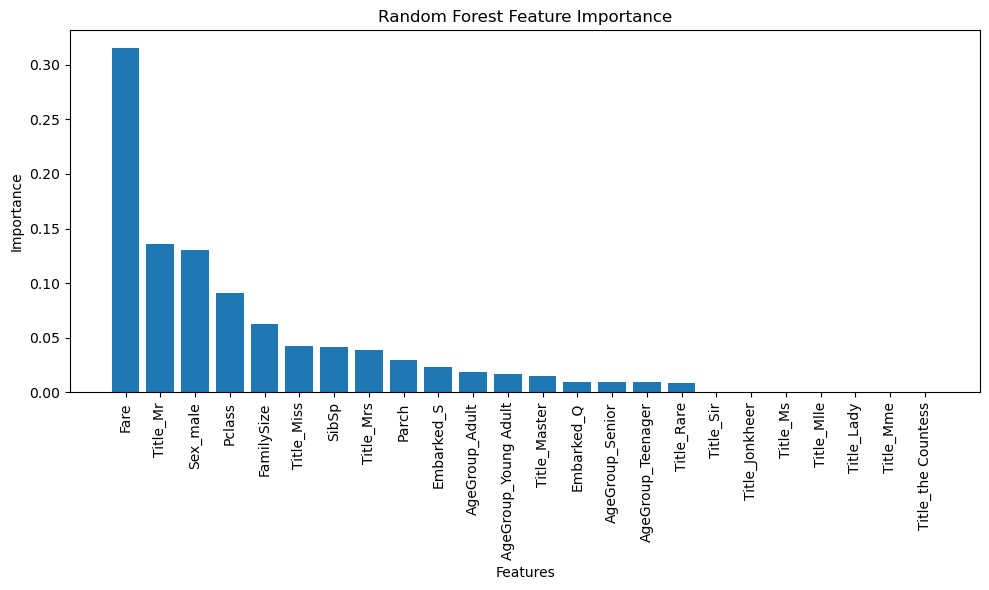

In [27]:
import matplotlib.pyplot as plt

# Get feature importances from the random forest model
importances = random_forest.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

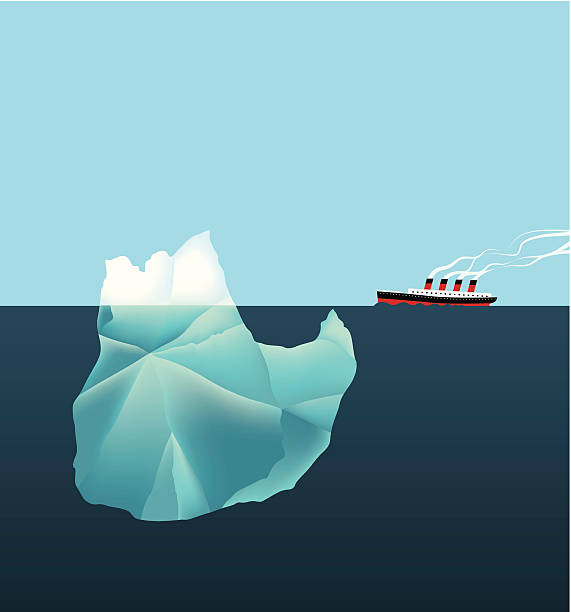

In [58]:
Image("G:/ML portfolio projects//Titanic 3.jpg")

### SVM Model

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the SVM model
svm = SVC()

# Train the SVM model
svm.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = svm.predict(X_train)

# Calculate evaluation metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = svm.predict(X_test)

# Calculate evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Print the evaluation metrics
print("SVM Model Evaluation:")
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1_score)
print("Training ROC AUC Score:", train_roc_auc)
print("")

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)
print("Test ROC AUC Score:", test_roc_auc)


SVM Model Evaluation:
Training Accuracy: 0.8338945005611672
Training Precision: 0.814935064935065
Training Recall: 0.7339181286549707
Training F1 Score: 0.7723076923076923
Training ROC AUC Score: 0.8150464960214744

Test Accuracy: 0.9473684210526315
Test Precision: 0.9012345679012346
Test Recall: 0.9605263157894737
Test F1 Score: 0.9299363057324841
Test ROC AUC Score: 0.950187969924812


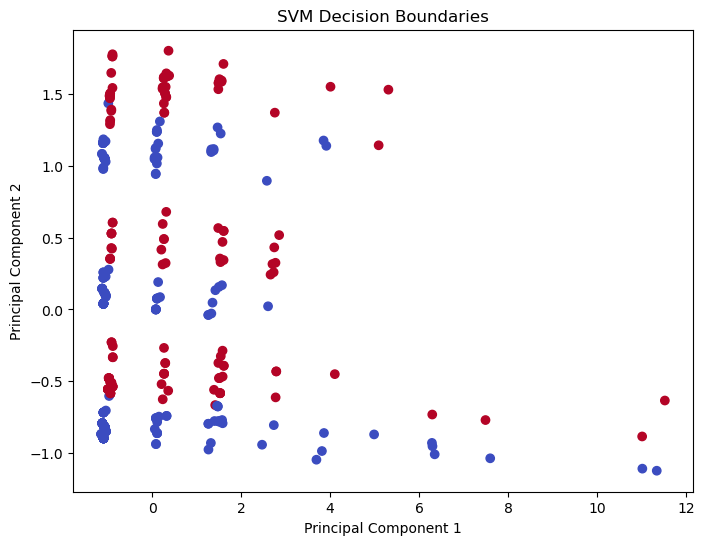

In [29]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Visualize the decision boundaries
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test, cmap='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundaries')
plt.show()


### XGBoost Model

In [30]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the XGBoost model
xgboost = xgb.XGBClassifier()

# Train the XGBoost model
xgboost.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = xgboost.predict(X_train)

# Calculate evaluation metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = xgboost.predict(X_test)

# Calculate evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Print the evaluation metrics
print("XGBoost Model Evaluation:")
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1_score)
print("Training ROC AUC Score:", train_roc_auc)
print("")

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)
print("Test ROC AUC Score:", test_roc_auc)

XGBoost Model Evaluation:
Training Accuracy: 0.9349046015712682
Training Precision: 0.9465408805031447
Training Recall: 0.8801169590643275
Training F1 Score: 0.9121212121212121
Training ROC AUC Score: 0.9245757837215991

Test Accuracy: 0.8325358851674641
Test Precision: 0.7928571428571428
Test Recall: 0.7302631578947368
Test F1 Score: 0.7602739726027398
Test ROC AUC Score: 0.8106203007518796


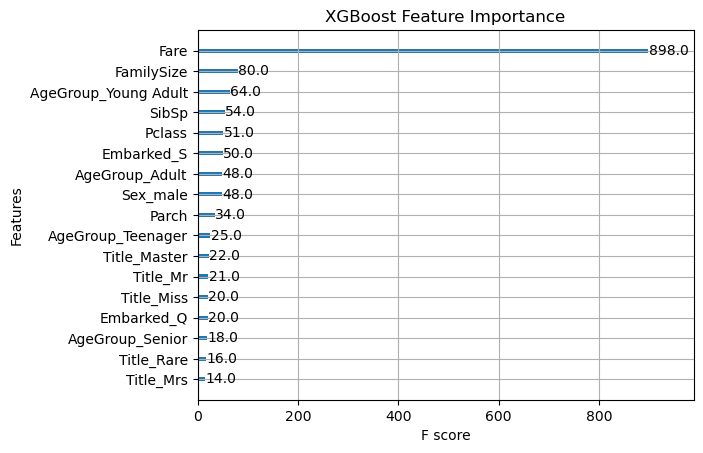

In [42]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you have trained an XGBoost model and assigned it to the variable 'xgboost_model'

# Plot feature importance
xgb.plot_importance(xgboost)
plt.title('XGBoost Feature Importance')
plt.show()

## Hyperparameter Tune
### Random Forest Model

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the random forest model
random_forest = RandomForestClassifier()

# Perform grid search
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the random forest model with the best hyperparameters
random_forest = RandomForestClassifier(**best_params)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = random_forest.predict(X_test)

# Calculate evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Random Forest Model Evaluation after Hyperparameter Tuning:")
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)
print("Test ROC AUC Score:", test_roc_auc)


Random Forest Model Evaluation after Hyperparameter Tuning:
Test Accuracy: 0.9114832535885168
Test Precision: 0.8662420382165605
Test Recall: 0.8947368421052632
Test F1 Score: 0.8802588996763755
Test ROC AUC Score: 0.9078947368421053


### Bagging (Random Forest)

In [49]:
from sklearn.ensemble import BaggingClassifier

# Initialize the base random forest model
base_model = RandomForestClassifier()

# Initialize the bagging classifier
bagging = BaggingClassifier(base_model, n_estimators=10)

# Train the bagging classifier
bagging.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = bagging.predict(X_test)

# Calculate evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Bagging (Random Forest) Model Evaluation:")
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)
print("Test ROC AUC Score:", test_roc_auc)

Bagging (Random Forest) Model Evaluation:
Test Accuracy: 0.8205741626794258
Test Precision: 0.7655172413793103
Test Recall: 0.7302631578947368
Test F1 Score: 0.7474747474747475
Test ROC AUC Score: 0.8012218045112781


### Boosting (Gradient Boosting)

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the gradient boosting classifier
boosting = GradientBoostingClassifier()

# Train the gradient boosting classifier
boosting.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = boosting.predict(X_test)

# Calculate evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Boosting (Gradient Boosting) Model Evaluation:")
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)
print("Test ROC AUC Score:", test_roc_auc)

Boosting (Gradient Boosting) Model Evaluation:
Test Accuracy: 0.84688995215311
Test Precision: 0.8188405797101449
Test Recall: 0.743421052631579
Test F1 Score: 0.7793103448275863
Test ROC AUC Score: 0.824718045112782


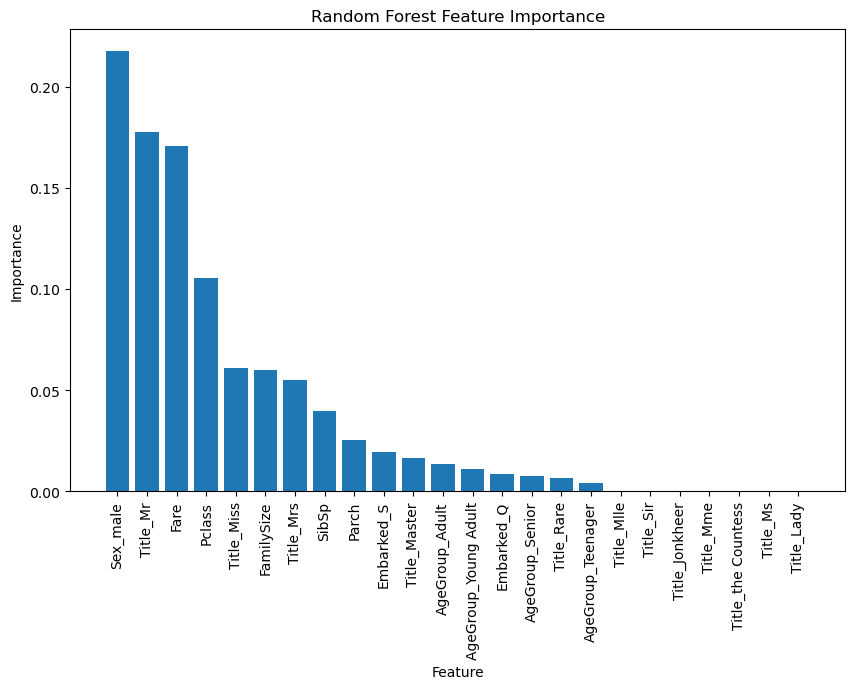

In [51]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = random_forest.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=90)
plt.show()

In [52]:
import pandas as pd

# Load the gender_submission.csv file
submission_data = pd.read_csv('gender_submission.csv')

# Extract the actual survival values from the submission data
actual_survival = submission_data['Survived']

# Calculate the accuracy of the model predictions
accuracy = accuracy_score(actual_survival, y_test_pred)

# Print the accuracy
print("Model Accuracy:", accuracy)

Model Accuracy: 0.84688995215311


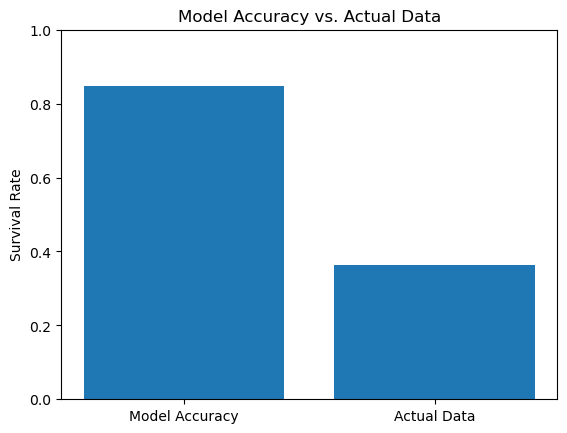

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the gender_submission.csv file
submission_data = pd.read_csv('gender_submission.csv')

# Extract the actual survival values from the submission data
actual_survival = submission_data['Survived']

# Calculate the accuracy of the model predictions
accuracy = accuracy_score(actual_survival, y_test_pred)

# Create a bar plot to visualize the comparison
labels = ['Model Accuracy', 'Actual Data']
values = [accuracy, actual_survival.mean()]
plt.bar(labels, values)
plt.ylim(0, 1)
plt.ylabel('Survival Rate')
plt.title('Model Accuracy vs. Actual Data')
plt.show()

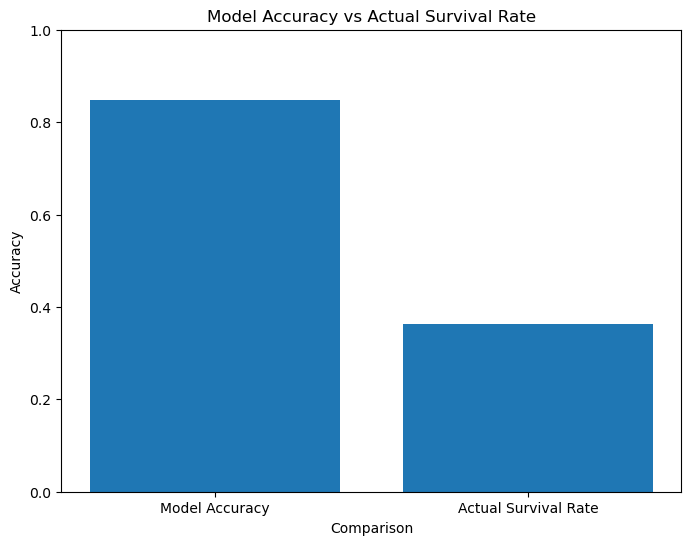

In [54]:
import matplotlib.pyplot as plt

# Calculate the accuracy of the model predictions
accuracy = accuracy_score(actual_survival, y_test_pred)

# Calculate the actual survival rate
actual_survival_rate = actual_survival.mean()

# Create a bar plot to compare accuracy with the actual survival rate
plt.figure(figsize=(8, 6))
plt.bar(['Model Accuracy', 'Actual Survival Rate'], [accuracy, actual_survival_rate])
plt.ylim([0, 1])
plt.xlabel('Comparison')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs Actual Survival Rate')
plt.show()

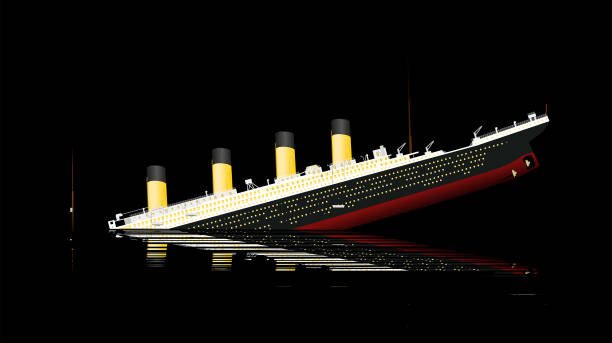

In [59]:
## In the comparison plot, the model accuracy bar represents the accuracy of the model's predictions, while the actual survival rate bar represents the true survival rate from the "gender_submission.csv" file. If the model accuracy bar is significantly higher than the actual survival rate bar, it indicates that the model is performing well and has a higher accuracy in predicting survival compared to the overall survival rate in the dataset. This suggests that the model is capturing patterns and making accurate predictions. On the other hand, if the model accuracy bar is closer to or lower than the actual survival rate bar, it indicates that the model's predictions are not significantly better than the baseline survival rate. In this case, it may suggest that the model is not capturing important patterns or there are limitations in the features or data used for training.
Image("G:/ML portfolio projects//Titanic 4.jpg")

In [73]:
# Import the necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Load the test dataset
test_data = pd.read_csv('test.csv')

# Perform the same preprocessing and feature engineering steps as done for the training dataset
# ... (code for preprocessing and feature engineering)

# Train the best-performing model on the entire training dataset
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Generate predictions for the test dataset
test_predictions = best_model.predict(X_test)

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})
# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)


In [75]:
import os

# Get the path to the desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")

# Specify the file path for saving the CSV file
csv_file_path = os.path.join(desktop_path, "predictions.csv")

# Save the DataFrame as a CSV file
submission_df.to_csv(csv_file_path, index=False)


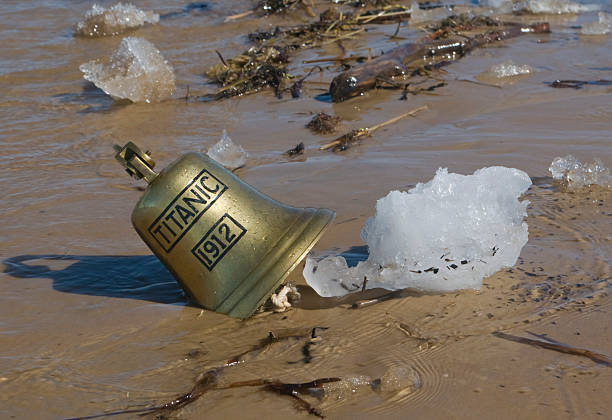

In [76]:
Image("G:/ML portfolio projects//Titanic 5.jpg")